In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from IPython import display
import pylab as pl
import time
import warnings
from sklearn.mixture import GaussianMixture

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=30, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
# Generate some data
from sklearn.datasets import make_blobs
X1, y1_true = make_blobs(n_samples=100, centers=1,
                       cluster_std=0.80, random_state=80)
X1 = X1[:, ::-1] # flip axes for better plotting

rng = np.random.RandomState(2401)
# pretty good 2359
# interesting 2341 
X1 = np.dot(X1, rng.randn(2, 2))

X2, y2_true = make_blobs(n_samples=100, centers=1,
                       cluster_std=0.60, random_state=9)

X2 = X2[:, ::-1] # flip axes for better plotting
# rng = np.random.RandomState(70)
X2 = np.dot(X2, rng.randn(2, 2))

X3, y3_true = make_blobs(n_samples=100, centers=1,
                       cluster_std=0.60, random_state=10)
X3 = X3[:, ::-1] # flip axes for better plotting

# rng = np.random.RandomState(70)
X3 = np.dot(X3, rng.randn(2, 2))

X4, y4_true = make_blobs(n_samples=100, centers=1,
                       cluster_std=0.60, random_state=11)
X4 = X4[:, ::-1] # flip axes for better plotting

# rng = np.random.RandomState(70)
X4 = np.dot(X4, rng.randn(2, 2))


y2_true += 1
y3_true += 2
y4_true += 3
X = np.vstack([X1, X2, X3, X4])
y_true = np.hstack([y1_true, y2_true, y3_true, y4_true])

#gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42, max_iter=1, init_params = 'kmeans')
#plot_gmm(gmm, X)

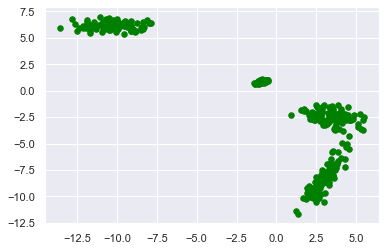

In [ ]:
plt.scatter(X[:, 0], X[:, 1], color='green', s = 30);

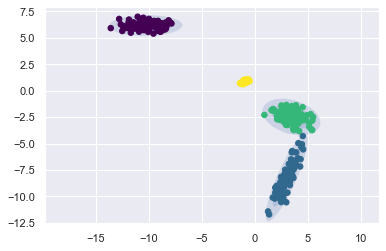

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(1, 25):
        gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42, max_iter=i, init_params = 'random')
        plt.clf()
        plot_gmm(gmm, X)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)